<a href="https://colab.research.google.com/github/NabilahSharfina/CELERATES-ACCELERATION-PROGRAM/blob/main/Final_Project_Credit_Risk_Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><bold>FINAL PROJECT</bold></center><h1>
<h1><center><bold>BIG DATA AND BUSINESS INTELLIGENCE</bold></center><h1>
<h1><center><bold>KAMPUS MERDEKA</bold></center><h1>
<h2><center><bold>CREDIT RISK ANALYSIS</bold></center><h2>

---



# **PREDICT DATA & MODELLING - DATA TRAIN**

## 2.1 Connect Google Drive

In [1]:
# Load data from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2.2 Import Library

In [2]:
import math
from collections import Counter
from pprint import pprint

import pandas as pd # for handling and cleaning the dataset
import numpy as np # for performing mathematical calculations behind ML algorithms
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization

# Label Encoding: digunakan untuk tipe data ordinal
from sklearn.preprocessing import LabelEncoder
# One Hot Encoding: digunakan untuk bukan tipe data ordinal, misal nominal, interval, dan ratio
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Handle imbalance dataset
from imblearn.over_sampling import SMOTE

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

from catboost import CatBoostClassifier
import catboost as ctb

## 2.3 EDA

### 2.3.1 Data Loading

In [3]:
df = pd.read_csv('/content/drive/MyDrive/KAMPUS MERDEKA /Celerates Acceleration Program /FINAL PROJECT/Dataset/Demo/credit_risk.csv')
df

,Unnamed: 0,Id_customer,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,KategoriUsia,CreditStatus
0,0,5008808,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,1,8,lansia,0
1,1,5008809,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,1,8,lansia,0
2,2,5008810,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,1,8,lansia,0
3,3,5008811,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,1,8,lansia,0
4,4,5008812,Perempuan,Tidak,Ya,0,283500.0,Pensioner,Post Graduate,Cerai,Rumah Pribadi,1,0,0,0,1,1001,lansia,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36252,36252,5149158,Laki-laki,Ya,Ya,0,247500.0,Bekerja,Graduate,Menikah,Rumah Pribadi,1,1,0,0,2,10,dewasa,1
36253,36253,5149190,Laki-laki,Ya,Tidak,1,450000.0,Bekerja,Post Graduate,Menikah,Rumah Pribadi,1,0,1,1,3,1,dewasa,1
36254,36254,5149729,Laki-laki,Ya,Ya,0,90000.0,Bekerja,Graduate,Menikah,Rumah Pribadi,1,0,0,0,2,5,lansia,1
36255,36255,5149828,Laki-laki,Ya,Ya,0,315000.0,Bekerja,Graduate,Menikah,Rumah Pribadi,1,0,0,0,2,7,lansia,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36257 entries, 0 to 36256
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           36257 non-null  int64  
 1   Id_customer          36257 non-null  int64  
 2   JenisKelamin         36257 non-null  object 
 3   KepemilikanMobil     36257 non-null  object 
 4   KepemilikanProperti  36257 non-null  object 
 5   JmlAnak              36257 non-null  int64  
 6   Pendapatan           36257 non-null  float64
 7   TipePendapatan       36257 non-null  object 
 8   TingkatPendidikan    36257 non-null  object 
 9   StatusKeluarga       36257 non-null  object 
 10  TipeRumah            36257 non-null  object 
 11  FlagMobile           36257 non-null  int64  
 12  FlagWorkPhone        36257 non-null  int64  
 13  FlagPhone            36257 non-null  int64  
 14  Email                36257 non-null  int64  
 15  JmlAnggotaKeluarga   36257 non-null 

In [5]:
df.dtypes.value_counts()

int64      10
object      8
float64     1
dtype: int64

In [6]:
# Melihat data unique dari setiap fitur dalam tabel
for feature in df.columns:
    print(
        f"- Jumlah unique value pada kolom `{feature}`:",
        df[feature].nunique()
    )

- Jumlah unique value pada kolom `Unnamed: 0`: 36257
- Jumlah unique value pada kolom `Id_customer`: 36257
- Jumlah unique value pada kolom `JenisKelamin`: 2
- Jumlah unique value pada kolom `KepemilikanMobil`: 2
- Jumlah unique value pada kolom `KepemilikanProperti`: 2
- Jumlah unique value pada kolom `JmlAnak`: 9
- Jumlah unique value pada kolom `Pendapatan`: 265
- Jumlah unique value pada kolom `TipePendapatan`: 5
- Jumlah unique value pada kolom `TingkatPendidikan`: 3
- Jumlah unique value pada kolom `StatusKeluarga`: 3
- Jumlah unique value pada kolom `TipeRumah`: 5
- Jumlah unique value pada kolom `FlagMobile`: 1
- Jumlah unique value pada kolom `FlagWorkPhone`: 2
- Jumlah unique value pada kolom `FlagPhone`: 2
- Jumlah unique value pada kolom `Email`: 2
- Jumlah unique value pada kolom `JmlAnggotaKeluarga`: 10
- Jumlah unique value pada kolom `Pengalaman`: 45
- Jumlah unique value pada kolom `KategoriUsia`: 4
- Jumlah unique value pada kolom `CreditStatus`: 2


In [7]:
# Melihat apakah ada missing value dari dataset
df.isna().sum()

Unnamed: 0             0
Id_customer            0
JenisKelamin           0
KepemilikanMobil       0
KepemilikanProperti    0
JmlAnak                0
Pendapatan             0
TipePendapatan         0
TingkatPendidikan      0
StatusKeluarga         0
TipeRumah              0
FlagMobile             0
FlagWorkPhone          0
FlagPhone              0
Email                  0
JmlAnggotaKeluarga     0
Pengalaman             0
KategoriUsia           0
CreditStatus           0
dtype: int64

In [8]:
# Mengecek baris yang duplikat
df[df['Id_customer'].duplicated()]

,Unnamed: 0,Id_customer,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,KategoriUsia,CreditStatus


In [9]:
# Menghapus kolom yang tidak digunakan
df = df.drop(columns=['Id_customer', 'FlagMobile'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36257 entries, 0 to 36256
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           36257 non-null  int64  
 1   JenisKelamin         36257 non-null  object 
 2   KepemilikanMobil     36257 non-null  object 
 3   KepemilikanProperti  36257 non-null  object 
 4   JmlAnak              36257 non-null  int64  
 5   Pendapatan           36257 non-null  float64
 6   TipePendapatan       36257 non-null  object 
 7   TingkatPendidikan    36257 non-null  object 
 8   StatusKeluarga       36257 non-null  object 
 9   TipeRumah            36257 non-null  object 
 10  FlagWorkPhone        36257 non-null  int64  
 11  FlagPhone            36257 non-null  int64  
 12  Email                36257 non-null  int64  
 13  JmlAnggotaKeluarga   36257 non-null  int64  
 14  Pengalaman           36257 non-null  int64  
 15  KategoriUsia         36257 non-null 

### 2.3.2 Feature Category

In [10]:
# Mengetahui kolom apa saja yang termasuk fitur (variabel) numerik/kategoris
numerical_features = df.select_dtypes(include="number").columns.tolist()
categorical_features = df.select_dtypes(include="object").columns.tolist()

print("Numerical features:")
pprint(numerical_features)
print("\nCategorical features:")
pprint(categorical_features, compact=True)

Numerical features:
['Unnamed: 0',
 'JmlAnak',
 'Pendapatan',
 'FlagWorkPhone',
 'FlagPhone',
 'Email',
 'JmlAnggotaKeluarga',
 'Pengalaman',
 'CreditStatus']

Categorical features:
['JenisKelamin', 'KepemilikanMobil', 'KepemilikanProperti', 'TipePendapatan',
 'TingkatPendidikan', 'StatusKeluarga', 'TipeRumah', 'KategoriUsia']


### 2.3.3 Statistic Summary

In [11]:
# Memahami karakteristik data melalui fitur-fitur numerik dengan function describe(). T=Transpose
df[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,36257.0,18128.000000,10466.638692,0.0,9064.0,18128.0,27192.0,36256.0
JmlAnak,36257.0,0.430427,0.742474,0.0,0.0,0.0,1.0,19.0
Pendapatan,36257.0,186625.534421,101548.649430,27000.0,121500.0,157500.0,225000.0,1575000.0
FlagWorkPhone,36257.0,0.225529,0.417936,0.0,0.0,0.0,0.0,1.0
FlagPhone,36257.0,0.294812,0.455965,0.0,0.0,0.0,1.0,1.0
Email,36257.0,0.089859,0.285983,0.0,0.0,0.0,0.0,1.0
JmlAnggotaKeluarga,36257.0,2.198720,0.911781,1.0,2.0,2.0,3.0,20.0
Pengalaman,36257.0,174.416058,371.770973,0.0,3.0,7.0,16.0,1001.0
CreditStatus,36257.0,0.116226,0.320500,0.0,0.0,0.0,0.0,1.0


In [12]:
# Memahami karakteristik data melalui fitur-fitur kategoris dengan function describe()
df[categorical_features].describe().T

,count,unique,top,freq
JenisKelamin,36257,2,Perempuan,24279
KepemilikanMobil,36257,2,Tidak,22476
KepemilikanProperti,36257,2,Ya,24367
TipePendapatan,36257,5,Bekerja,18708
TingkatPendidikan,36257,3,Graduate,26046
StatusKeluarga,36257,3,Menikah,27845
TipeRumah,36257,5,Rumah Pribadi,32367
KategoriUsia,36257,4,dewasa,19853


### 2.3.4 Data Correlation

In [13]:
# Melihat hubungan dari fitur numerik menggunakan correlation 
df.corr()

,Unnamed: 0,JmlAnak,Pendapatan,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,CreditStatus
Unnamed: 0,1.000000,0.083421,0.150057,0.096805,-0.022545,-0.035940,0.108389,-0.166022,0.044591
JmlAnak,0.083421,1.000000,0.033966,0.048033,-0.016770,0.015415,0.889197,-0.231313,0.011496
Pendapatan,0.150057,0.033966,1.000000,-0.037265,0.018073,0.087229,0.024134,-0.169050,0.023706
FlagWorkPhone,0.096805,0.048033,-0.037265,1.000000,0.312099,-0.035255,0.064640,-0.242498,-0.000078
FlagPhone,-0.022545,-0.016770,0.018073,0.312099,1.000000,0.010471,-0.004652,-0.005600,-0.006858
Email,-0.035940,0.015415,0.087229,-0.035255,0.010471,1.000000,0.014129,-0.087042,0.019360
JmlAnggotaKeluarga,0.108389,0.889197,0.024134,0.064640,-0.004652,0.014129,1.000000,-0.223191,0.009117
Pengalaman,-0.166022,-0.231313,-0.169050,-0.242498,-0.005600,-0.087042,-0.223191,1.000000,-0.022593
CreditStatus,0.044591,0.011496,0.023706,-0.000078,-0.006858,0.019360,0.009117,-0.022593,1.000000


> Untuk lebih jelas dalam mengetahui pasangan fitur mana yang memiliki koefisien korelasi yang kuat (mendekati 1 atau mendekati -1), kita bisa buat plot heatmap berikut.

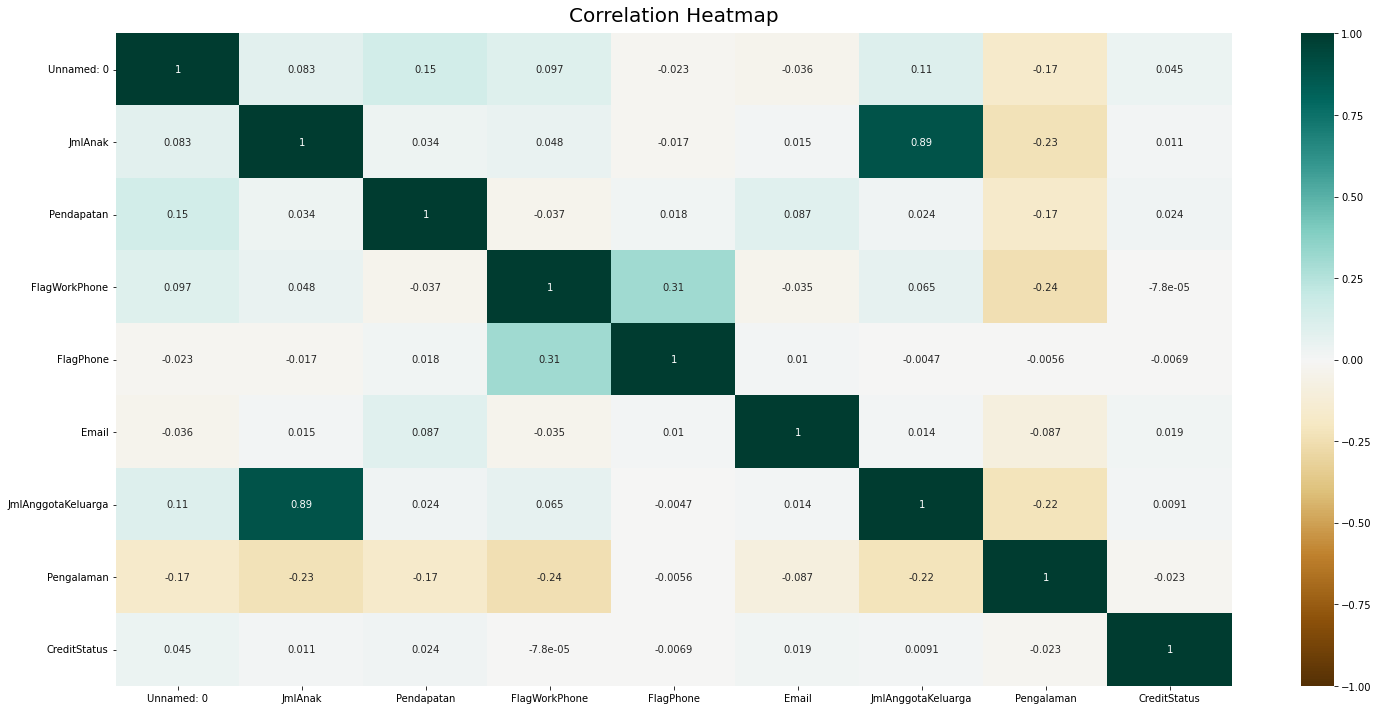

In [14]:
plt.figure(figsize=(25, 12))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);

### 2.3.5 Handling Outlier

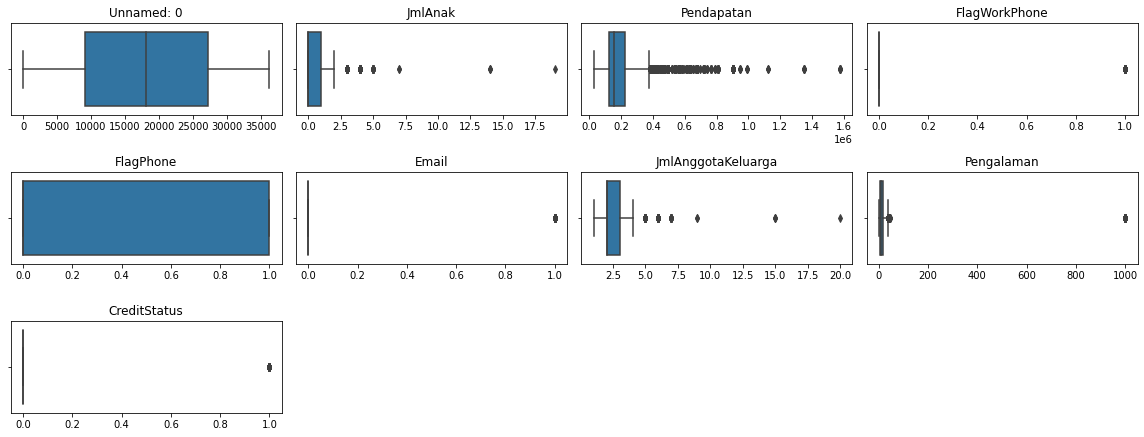

In [15]:
# Numerical Features
plt.figure(figsize=(16, 8), facecolor='white')
plotnumber = 1
    
for feature in numerical_features:
    ax = plt.subplot(4,4, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=12)
    plt.xlabel(None)
    plt.tight_layout()
    plotnumber += 1

> Ada beberapa cara untuk menghilangkan outliers.
* Mengganti nilai outliers menggunakan nilai lower bound dan upper bound.
* Capping menggunakan nilai median
* Capping menggunakan nilai mean
* Capping menggunakan nilai modus

> **Referensi:** [handling outlier](https://blog.sanbercode.com/docs/materi-eda/data-type-missing-value-outlier/)

In [16]:
# Membuat function IQR Detection
def outlier(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr * 1.5
    print(f'IQR: {iqr}')
    upperlimit = q3 + limit
    lowerlimit = q1 - limit
    print(f'Upper Limit: {upperlimit}')
    print(f'Lower Limit: {lowerlimit}')

# Buang Outlier
outlier_feature = [
                    'JmlAnak', 
                    'Pendapatan',
                    'JmlAnggotaKeluarga', 
                    'Pengalaman'
                    ]

for i in outlier_feature:
    print(i)
    outlier(df[i])
    print()

df = df[
        (df['JmlAnak'] < 2.5) & 
        (df['Pendapatan'] < 380250.0) & 
        (df['JmlAnggotaKeluarga'] < 4.5) & 
        (df['Pengalaman'] < 35.5)
        ]

JmlAnak
IQR: 1.0
Upper Limit: 2.5
Lower Limit: -1.5

Pendapatan
IQR: 103500.0
Upper Limit: 380250.0
Lower Limit: -33750.0

JmlAnggotaKeluarga
IQR: 1.0
Upper Limit: 4.5
Lower Limit: 0.5

Pengalaman
IQR: 13.0
Upper Limit: 35.5
Lower Limit: -16.5



In [17]:
# Clean dataframe from outlier
credit_risk_df = df.drop_duplicates()
credit_risk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28168 entries, 0 to 36256
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           28168 non-null  int64  
 1   JenisKelamin         28168 non-null  object 
 2   KepemilikanMobil     28168 non-null  object 
 3   KepemilikanProperti  28168 non-null  object 
 4   JmlAnak              28168 non-null  int64  
 5   Pendapatan           28168 non-null  float64
 6   TipePendapatan       28168 non-null  object 
 7   TingkatPendidikan    28168 non-null  object 
 8   StatusKeluarga       28168 non-null  object 
 9   TipeRumah            28168 non-null  object 
 10  FlagWorkPhone        28168 non-null  int64  
 11  FlagPhone            28168 non-null  int64  
 12  Email                28168 non-null  int64  
 13  JmlAnggotaKeluarga   28168 non-null  int64  
 14  Pengalaman           28168 non-null  int64  
 15  KategoriUsia         28168 non-null 

In [18]:
credit_risk_df.value_counts('CreditStatus')

CreditStatus
0    24830
1     3338
dtype: int64

### 2.3.6 Visualization

In [19]:
# Visualisasi kolom status untuk melihat jumlah data
def plot_count(data, x=None, y=None, palette=None, figsize=(12, 4), **kwargs):
    column_order = data[x or y].value_counts().index

    plt.figure(figsize=figsize)
    sns.countplot(
        x=x, y=y, data=data, order=column_order,
        palette=palette, **kwargs
    )
    plt.grid(False)

MAIN_COLOR = ["#29B5BF"] 
OTHER_COLOR = ["#777777"]

#### 2.3.6.1 Jenis Kelamin

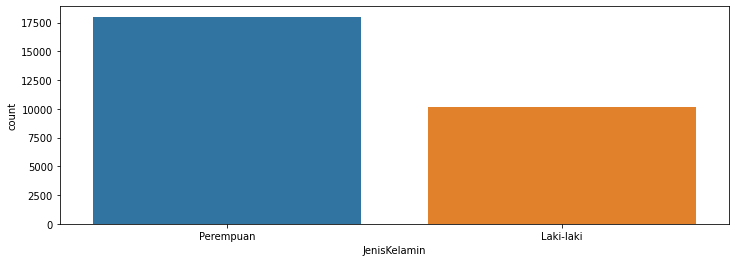

In [20]:
# Show visualization 'JenisKelamin'
plot_count(x="JenisKelamin", data=credit_risk_df)

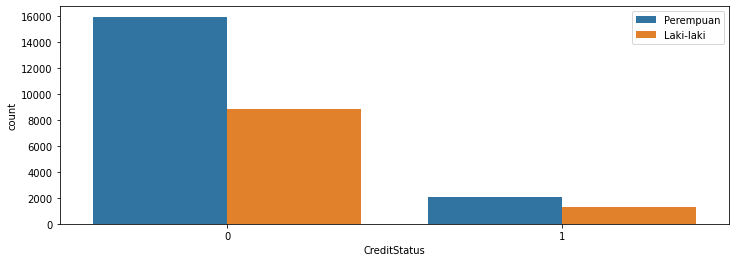

In [21]:
# Show visualization 'CreditStatus' terhadap 'JenisKelamin'
plot_count(x="CreditStatus", hue="JenisKelamin", data=credit_risk_df, figsize=(12, 4))
plt.legend(loc="upper right")
plt.show()

#### 2.3.6.2 Kepemilikan

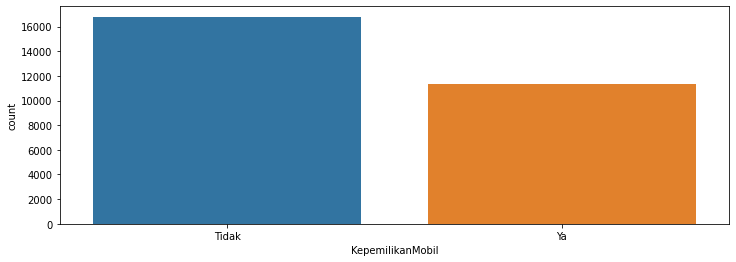

In [22]:
# Show visualization 'KepemilikanMobil'
plot_count(x="KepemilikanMobil", data=credit_risk_df)

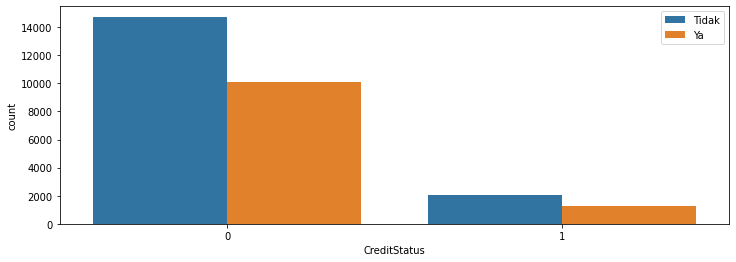

In [23]:
# Show visualization 'CreditStatus' terhadap 'KepemilikanMobil'
plot_count(x="CreditStatus", hue="KepemilikanMobil", data=credit_risk_df, figsize=(12, 4))
plt.legend(loc="upper right")
plt.show()

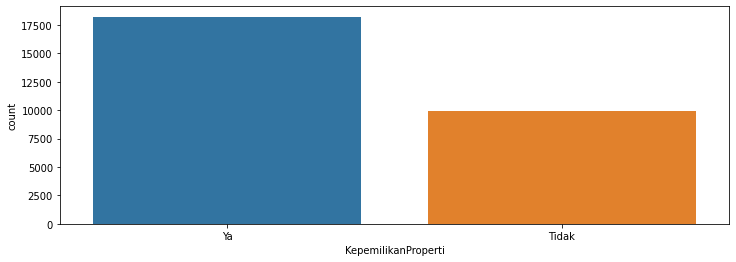

In [24]:
# Show visualization 'KepemilikanProperti'
plot_count(x="KepemilikanProperti", data=credit_risk_df)

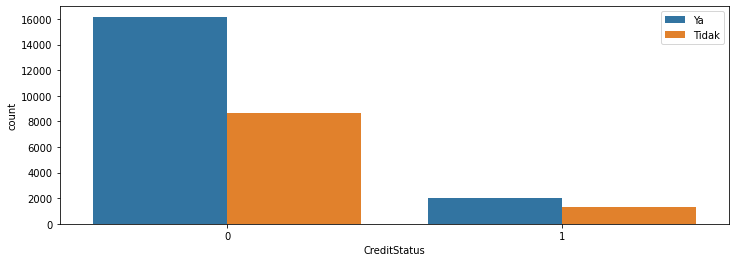

In [25]:
# Show visualization 'CreditStatus' terhadap 'KepemilikanProperti'
plot_count(x="CreditStatus", hue="KepemilikanProperti", data=credit_risk_df, figsize=(12, 4))
plt.legend(loc="upper right")
plt.show()

#### 2.3.6.3 Credit Status

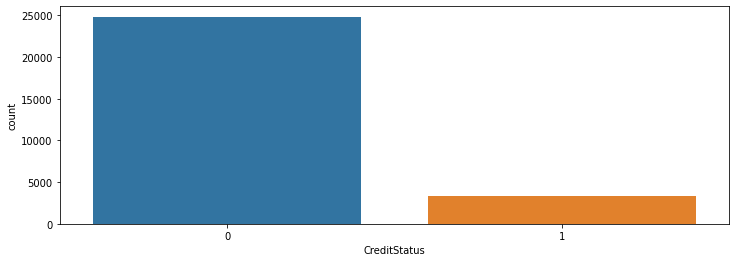

In [26]:
# Show visualization 'CreditStatus'
plot_count(x="CreditStatus", data=credit_risk_df)

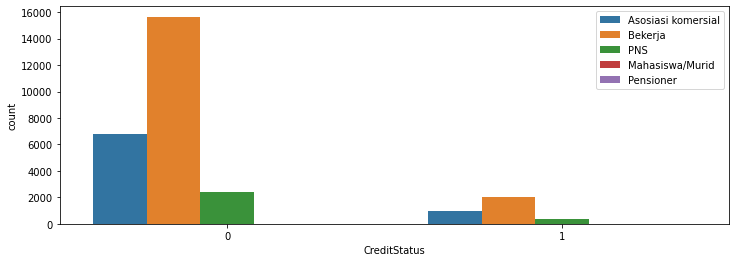

In [27]:
# Show visualization 'CreditStatus' terhadap 'TipePendapatan'
plot_count(x="CreditStatus", hue="TipePendapatan", data=credit_risk_df, figsize=(12, 4))
plt.legend(loc="upper right")
plt.show()

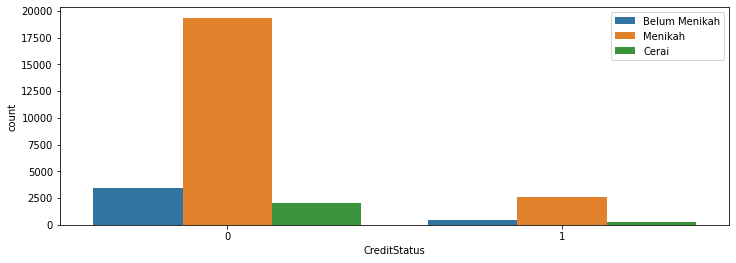

In [28]:
# Show visualization 'CreditStatus' terhadap 'StatusKeluarga'
plot_count(x="CreditStatus", hue="StatusKeluarga", data=credit_risk_df, figsize=(12, 4))
plt.legend(loc="upper right")
plt.show()

#### 2.3.6.4 Kategori Usia

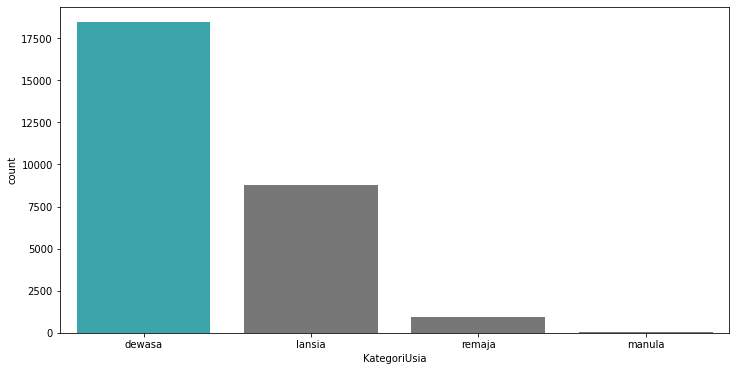

In [29]:
age_category = credit_risk_df.KategoriUsia.value_counts().index

plt.figure(figsize=(12, 6))
sns.countplot(
    x="KategoriUsia",
    data=credit_risk_df,
    order=age_category,
    palette=["#29B5BF"] + (len(age_category)-1)*["#777777"]
)
plt.grid(False)

plt.show()

> **Insights:** 

> * Dari visualisasi di atas, terlihat bahwa mayoritas adalah kategori **Dewasa**.
> * Lalu, bagaimana distribusi kategori umur pada masing-masing responden yang memiliki sakit jantung maupun tidak? Mari kita buat visualisasinya.

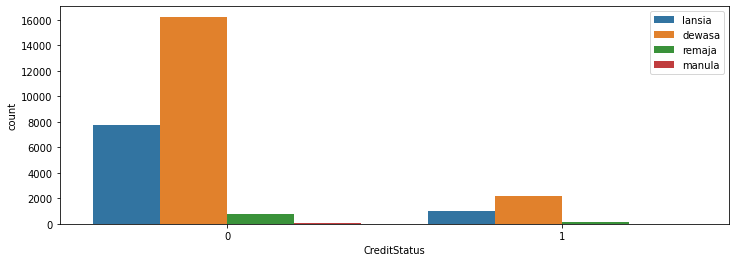

In [30]:
# Show visualization 'CreditStatus' terhadap 'KategoriUsia'
plot_count(x="CreditStatus", hue="KategoriUsia", data=credit_risk_df, figsize=(12, 4))
plt.legend(loc="upper right")
plt.show()

## 2.4 Modelling

In [31]:
credit_risk_df.head()

,Unnamed: 0,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,KategoriUsia,CreditStatus
0,0,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,0,1,1,1,8,lansia,0
1,1,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,0,1,1,1,8,lansia,0
2,2,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,0,1,1,1,8,lansia,0
3,3,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,0,1,1,1,8,lansia,0
7,7,Perempuan,Ya,Tidak,0,130500.0,Bekerja,Graduate,Menikah,Rumah Pribadi,0,0,0,2,3,dewasa,1


In [32]:
# Melihat isi data dari setiap kolom
for feature in df.columns:
    print(
        f"- Rows value pada kolom `{feature}`:",
        credit_risk_df[feature].unique()
    )

- Rows value pada kolom `Unnamed: 0`: [    0     1     2 ... 36254 36255 36256]
- Rows value pada kolom `JenisKelamin`: ['Perempuan' 'Laki-laki']
- Rows value pada kolom `KepemilikanMobil`: ['Tidak' 'Ya']
- Rows value pada kolom `KepemilikanProperti`: ['Ya' 'Tidak']
- Rows value pada kolom `JmlAnak`: [0 1 2]
- Rows value pada kolom `Pendapatan`: [270000.  130500.  157500.  112500.  135000.  211500.  126000.  247500.
 297000.  216000.  225000.  315000.  148500.  202500.  180000.  292500.
  74250.  144000.  193500.  139500.   76500.   67500.   90000.   81000.
 198000.   45000.  238500.   99000.  360000.  279000.  306000.  189000.
 328500.  310500.  171000.  121500.   72000.  184500.   94500.  256500.
 166500.  196650.   40500.  243000.  162000.  103500.  257625.   58500.
 207000.   54000.  234000.  117000.  261000.  175500.  337500.  119250.
  63000.  274500.   85500.  108000.  145350.  173250.   36000.  118350.
 153000.  123750.  252000.  220500.  133650.  265500.  227250.   51750.
  69

### 2.4.1 Categorical Encoding

> **Note:** Jenis-Jenis Tipe Data
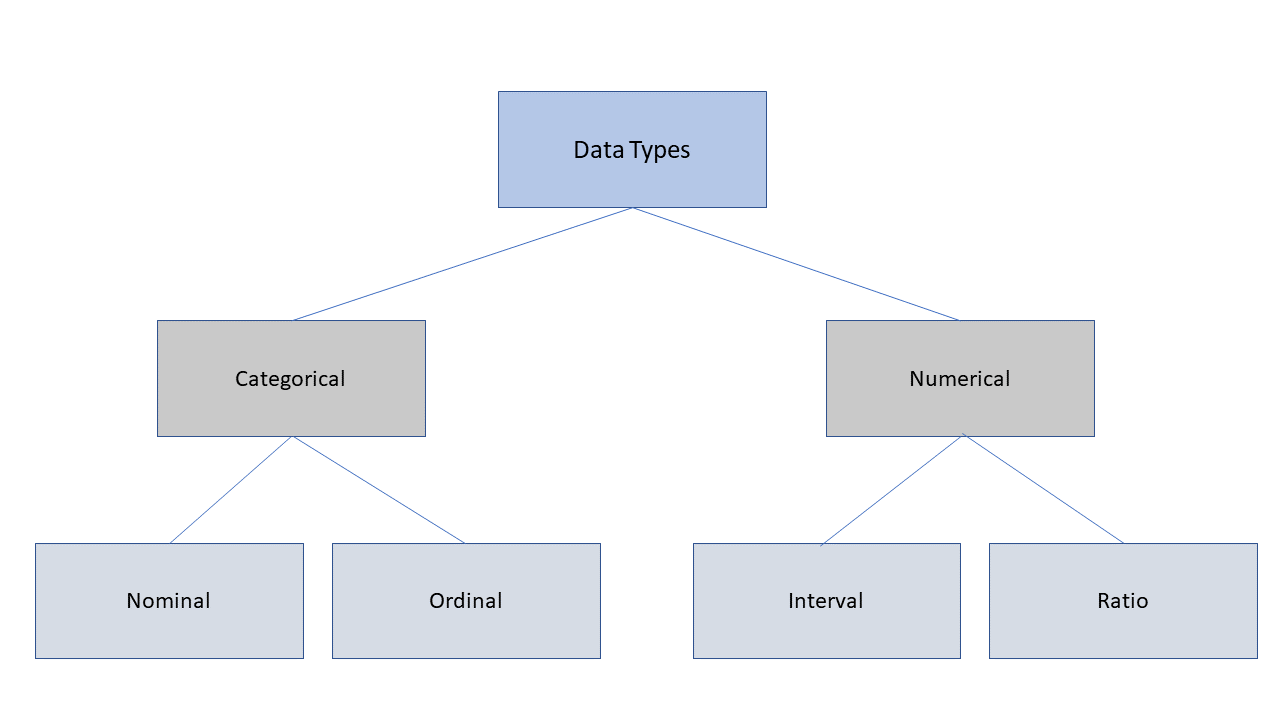

> Dilihat dari isi value masing-masing fitur, maka encoding akan terbagi menjadi 2 yaitu: 
> 1. ***Label Encoding*** untuk fitur kategorik tipe data ordinal seperti `TingkatPendidikan`, `StatusKeluarga`, `KategoriUsia` 
> 2. ***One Hot Encoding*** untuk fitur kategorik tipe data nominal, interval, dan rasio (sisa fitur kategorik lainnya, selain ordinal).

#### 2.4.1.1 Label Encoding

In [33]:
# Creating instance of labelencoder
labelencoder = LabelEncoder()

# Creating initial
cols = [
        'TingkatPendidikan',  
        'StatusKeluarga',
        'KategoriUsia'
        ]

# Assigning numerical values and storing in another column
for col_le in cols:
    credit_risk_df[col_le] = labelencoder.fit_transform(credit_risk_df[col_le])

In [34]:
label_encoding_df = pd.DataFrame(credit_risk_df)
label_encoding_df.head()

,Unnamed: 0,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,KategoriUsia,CreditStatus
0,0,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,0,0,Rumah Pribadi,0,1,1,1,8,1,0
1,1,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,0,0,Rumah Pribadi,0,1,1,1,8,1,0
2,2,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,0,0,Rumah Pribadi,0,1,1,1,8,1,0
3,3,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,0,0,Rumah Pribadi,0,1,1,1,8,1,0
7,7,Perempuan,Ya,Tidak,0,130500.0,Bekerja,0,2,Rumah Pribadi,0,0,0,2,3,0,1


In [35]:
label_encoding_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28168 entries, 0 to 36256
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           28168 non-null  int64  
 1   JenisKelamin         28168 non-null  object 
 2   KepemilikanMobil     28168 non-null  object 
 3   KepemilikanProperti  28168 non-null  object 
 4   JmlAnak              28168 non-null  int64  
 5   Pendapatan           28168 non-null  float64
 6   TipePendapatan       28168 non-null  object 
 7   TingkatPendidikan    28168 non-null  int64  
 8   StatusKeluarga       28168 non-null  int64  
 9   TipeRumah            28168 non-null  object 
 10  FlagWorkPhone        28168 non-null  int64  
 11  FlagPhone            28168 non-null  int64  
 12  Email                28168 non-null  int64  
 13  JmlAnggotaKeluarga   28168 non-null  int64  
 14  Pengalaman           28168 non-null  int64  
 15  KategoriUsia         28168 non-null 

#### 2.4.1.2 One Hot Encoding

##### a. Cara 1 - with Scikit Learn


In [36]:
cat_cols = credit_risk_df.select_dtypes('category').columns
encoder = OneHotEncoder(drop='first', sparse=False)
encoder.fit(credit_risk_df[cat_cols])

OneHotEncoder(drop='first', sparse=False)

In [37]:
x_dummy = pd.DataFrame(encoder.transform(credit_risk_df[cat_cols]), index=credit_risk_df.index, columns=encoder.get_feature_names(credit_risk_df[cat_cols].columns))
x_dummy.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


""
0
1
2
3
7


In [38]:
x_dummy = pd.concat([credit_risk_df.select_dtypes(exclude='category'), x_dummy], axis=1)
x_dummy.head()

,Unnamed: 0,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,KategoriUsia,CreditStatus
0,0,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,0,0,Rumah Pribadi,0,1,1,1,8,1,0
1,1,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,0,0,Rumah Pribadi,0,1,1,1,8,1,0
2,2,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,0,0,Rumah Pribadi,0,1,1,1,8,1,0
3,3,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,0,0,Rumah Pribadi,0,1,1,1,8,1,0
7,7,Perempuan,Ya,Tidak,0,130500.0,Bekerja,0,2,Rumah Pribadi,0,0,0,2,3,0,1


In [39]:
x_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28168 entries, 0 to 36256
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           28168 non-null  int64  
 1   JenisKelamin         28168 non-null  object 
 2   KepemilikanMobil     28168 non-null  object 
 3   KepemilikanProperti  28168 non-null  object 
 4   JmlAnak              28168 non-null  int64  
 5   Pendapatan           28168 non-null  float64
 6   TipePendapatan       28168 non-null  object 
 7   TingkatPendidikan    28168 non-null  int64  
 8   StatusKeluarga       28168 non-null  int64  
 9   TipeRumah            28168 non-null  object 
 10  FlagWorkPhone        28168 non-null  int64  
 11  FlagPhone            28168 non-null  int64  
 12  Email                28168 non-null  int64  
 13  JmlAnggotaKeluarga   28168 non-null  int64  
 14  Pengalaman           28168 non-null  int64  
 15  KategoriUsia         28168 non-null 

##### b. Cara 2 - with Pandas

In [40]:
one_hot_encoded_df = pd.get_dummies(credit_risk_df, columns = ['JenisKelamin', 'KepemilikanMobil', 'KepemilikanProperti', 'TipePendapatan', 'TipeRumah'])
one_hot_encoded_df.head()

,Unnamed: 0,JmlAnak,Pendapatan,TingkatPendidikan,StatusKeluarga,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,...,TipePendapatan_Asosiasi komersial,TipePendapatan_Bekerja,TipePendapatan_Mahasiswa/Murid,TipePendapatan_PNS,TipePendapatan_Pensioner,TipeRumah_Apartment Kantor,TipeRumah_Apartment Pribadi,TipeRumah_Rumah Orang Tua,TipeRumah_Rumah Pribadi,TipeRumah_Sewa Apartment
0,0,0,270000.0,0,0,0,1,1,1,8,...,1,0,0,0,0,0,0,0,1,0
1,1,0,270000.0,0,0,0,1,1,1,8,...,1,0,0,0,0,0,0,0,1,0
2,2,0,270000.0,0,0,0,1,1,1,8,...,1,0,0,0,0,0,0,0,1,0
3,3,0,270000.0,0,0,0,1,1,1,8,...,1,0,0,0,0,0,0,0,1,0
7,7,0,130500.0,0,2,0,0,0,2,3,...,0,1,0,0,0,0,0,0,1,0


In [41]:
one_hot_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28168 entries, 0 to 36256
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         28168 non-null  int64  
 1   JmlAnak                            28168 non-null  int64  
 2   Pendapatan                         28168 non-null  float64
 3   TingkatPendidikan                  28168 non-null  int64  
 4   StatusKeluarga                     28168 non-null  int64  
 5   FlagWorkPhone                      28168 non-null  int64  
 6   FlagPhone                          28168 non-null  int64  
 7   Email                              28168 non-null  int64  
 8   JmlAnggotaKeluarga                 28168 non-null  int64  
 9   Pengalaman                         28168 non-null  int64  
 10  KategoriUsia                       28168 non-null  int64  
 11  CreditStatus                       28168 non-null  int

### 2.4.2 Normalization

##### 2.4.2.1 Cara 1 - with Scikit Learn

In [42]:
mms = MinMaxScaler()
min_max_scaled = pd.DataFrame(mms.fit_transform(one_hot_encoded_df), columns=one_hot_encoded_df.columns).set_index(one_hot_encoded_df.index)
min_max_scaled.head()

,Unnamed: 0,JmlAnak,Pendapatan,TingkatPendidikan,StatusKeluarga,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,...,TipePendapatan_Asosiasi komersial,TipePendapatan_Bekerja,TipePendapatan_Mahasiswa/Murid,TipePendapatan_PNS,TipePendapatan_Pensioner,TipeRumah_Apartment Kantor,TipeRumah_Apartment Pribadi,TipeRumah_Rumah Orang Tua,TipeRumah_Rumah Pribadi,TipeRumah_Sewa Apartment
0,0.000000,0.0,0.692308,0.0,0.0,0.0,1.0,1.0,0.000000,0.228571,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000028,0.0,0.692308,0.0,0.0,0.0,1.0,1.0,0.000000,0.228571,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000055,0.0,0.692308,0.0,0.0,0.0,1.0,1.0,0.000000,0.228571,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000083,0.0,0.692308,0.0,0.0,0.0,1.0,1.0,0.000000,0.228571,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.000193,0.0,0.294872,0.0,1.0,0.0,0.0,0.0,0.333333,0.085714,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [43]:
min_max_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28168 entries, 0 to 36256
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         28168 non-null  float64
 1   JmlAnak                            28168 non-null  float64
 2   Pendapatan                         28168 non-null  float64
 3   TingkatPendidikan                  28168 non-null  float64
 4   StatusKeluarga                     28168 non-null  float64
 5   FlagWorkPhone                      28168 non-null  float64
 6   FlagPhone                          28168 non-null  float64
 7   Email                              28168 non-null  float64
 8   JmlAnggotaKeluarga                 28168 non-null  float64
 9   Pengalaman                         28168 non-null  float64
 10  KategoriUsia                       28168 non-null  float64
 11  CreditStatus                       28168 non-null  flo

##### 2.4.2.2 Cara 2 - with Pandas

In [44]:
# copy the data
df_min_max_scaled = one_hot_encoded_df.copy()

# apply normalization techniques
for column in df_min_max_scaled.columns:
	df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())	

# view normalized data
df_min_max_scaled.head()

,Unnamed: 0,JmlAnak,Pendapatan,TingkatPendidikan,StatusKeluarga,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,...,TipePendapatan_Asosiasi komersial,TipePendapatan_Bekerja,TipePendapatan_Mahasiswa/Murid,TipePendapatan_PNS,TipePendapatan_Pensioner,TipeRumah_Apartment Kantor,TipeRumah_Apartment Pribadi,TipeRumah_Rumah Orang Tua,TipeRumah_Rumah Pribadi,TipeRumah_Sewa Apartment
0,0.000000,0.0,0.692308,0.0,0.0,0.0,1.0,1.0,0.000000,0.228571,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000028,0.0,0.692308,0.0,0.0,0.0,1.0,1.0,0.000000,0.228571,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000055,0.0,0.692308,0.0,0.0,0.0,1.0,1.0,0.000000,0.228571,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000083,0.0,0.692308,0.0,0.0,0.0,1.0,1.0,0.000000,0.228571,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.000193,0.0,0.294872,0.0,1.0,0.0,0.0,0.0,0.333333,0.085714,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
df_min_max_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28168 entries, 0 to 36256
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         28168 non-null  float64
 1   JmlAnak                            28168 non-null  float64
 2   Pendapatan                         28168 non-null  float64
 3   TingkatPendidikan                  28168 non-null  float64
 4   StatusKeluarga                     28168 non-null  float64
 5   FlagWorkPhone                      28168 non-null  float64
 6   FlagPhone                          28168 non-null  float64
 7   Email                              28168 non-null  float64
 8   JmlAnggotaKeluarga                 28168 non-null  float64
 9   Pengalaman                         28168 non-null  float64
 10  KategoriUsia                       28168 non-null  float64
 11  CreditStatus                       28168 non-null  flo

### 2.4.3 Data Splitting

> Pada tahap ini, membagi dataset menjadi 2, yaitu: 
> * **data train**, dan
> * **data test** 

> Dengan proporsi **80% : 20%**

In [46]:
# Define variable X (Independent variable / features)
X = min_max_scaled.drop(columns=["CreditStatus"]).copy()

# Define variable y (Dependent variable / target variable)
Y = min_max_scaled["CreditStatus"].copy()

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 12)

### 2.4.4 Handling Imbalance

In [48]:
oversampling = SMOTE(sampling_strategy='auto')

# Fit the over sampling
X_r, Y_r = oversampling.fit_resample(X_train, Y_train)

print('Original dataset shape is ', Counter(Y_train))
print('Resample dataset shape is ', Counter(Y_r))

Original dataset shape is  Counter({0.0: 19857, 1.0: 2677})
Resample dataset shape is  Counter({0.0: 19857, 1.0: 19857})


### 2.4.5 Data Rescalling

In [49]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [50]:
X_train.head()

,Unnamed: 0,JmlAnak,Pendapatan,TingkatPendidikan,StatusKeluarga,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,...,TipePendapatan_Asosiasi komersial,TipePendapatan_Bekerja,TipePendapatan_Mahasiswa/Murid,TipePendapatan_PNS,TipePendapatan_Pensioner,TipeRumah_Apartment Kantor,TipeRumah_Apartment Pribadi,TipeRumah_Rumah Orang Tua,TipeRumah_Rumah Pribadi,TipeRumah_Sewa Apartment
10810,0.298158,0.0,0.243590,0.0,1.0,1.0,1.0,0.0,0.333333,0.057143,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29606,0.816582,0.0,0.435897,0.5,1.0,0.0,0.0,0.0,0.333333,0.114286,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19292,0.532105,0.5,0.371795,0.0,1.0,0.0,1.0,0.0,0.666667,0.028571,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20679,0.570361,0.0,0.692308,0.0,1.0,1.0,1.0,0.0,0.333333,0.142857,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12314,0.339640,0.0,0.948718,0.0,1.0,0.0,0.0,0.0,0.333333,0.085714,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [51]:
X_train_scaled.head()

,Unnamed: 0,JmlAnak,Pendapatan,TingkatPendidikan,StatusKeluarga,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,...,TipePendapatan_Asosiasi komersial,TipePendapatan_Bekerja,TipePendapatan_Mahasiswa/Murid,TipePendapatan_PNS,TipePendapatan_Pensioner,TipeRumah_Apartment Kantor,TipeRumah_Apartment Pribadi,TipeRumah_Rumah Orang Tua,TipeRumah_Rumah Pribadi,TipeRumah_Sewa Apartment
0,-0.753014,-0.677208,-0.930749,-0.619403,0.506356,1.623119,1.553284,-0.330499,-0.278211,-0.822693,...,1.619875,-1.291881,-0.018845,-0.329672,-0.018845,-0.111967,-0.182976,-0.253039,0.375064,-0.136807
1,1.031691,-0.677208,0.019754,1.486137,0.506356,-0.616098,-0.643797,-0.330499,-0.278211,-0.503154,...,-0.617332,0.774065,-0.018845,-0.329672,-0.018845,-0.111967,-0.182976,3.951961,-2.666209,-0.136807
2,0.052363,0.794364,-0.297080,-0.619403,0.506356,-0.616098,1.553284,-0.330499,0.890982,-0.982463,...,-0.617332,0.774065,-0.018845,-0.329672,-0.018845,-0.111967,-0.182976,-0.253039,0.375064,-0.136807
3,0.184061,-0.677208,1.287092,-0.619403,0.506356,1.623119,1.553284,-0.330499,-0.278211,-0.343384,...,-0.617332,0.774065,-0.018845,-0.329672,-0.018845,-0.111967,-0.182976,-0.253039,0.375064,-0.136807
4,-0.610207,-0.677208,2.554430,-0.619403,0.506356,-0.616098,-0.643797,-0.330499,-0.278211,-0.662923,...,-0.617332,0.774065,-0.018845,-0.329672,-0.018845,-0.111967,-0.182976,-0.253039,0.375064,-0.136807


In [52]:
X_train_scaled_df = X_train_scaled.drop_duplicates()
X_train_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22534 entries, 0 to 22533
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         22534 non-null  float64
 1   JmlAnak                            22534 non-null  float64
 2   Pendapatan                         22534 non-null  float64
 3   TingkatPendidikan                  22534 non-null  float64
 4   StatusKeluarga                     22534 non-null  float64
 5   FlagWorkPhone                      22534 non-null  float64
 6   FlagPhone                          22534 non-null  float64
 7   Email                              22534 non-null  float64
 8   JmlAnggotaKeluarga                 22534 non-null  float64
 9   Pengalaman                         22534 non-null  float64
 10  KategoriUsia                       22534 non-null  float64
 11  JenisKelamin_Laki-laki             22534 non-null  flo

### 2.4.6 Modelling

In [53]:
# Membuat model machine learning
pipeline = []
pipeline.append(SVC())
pipeline.append(KNeighborsClassifier())
pipeline.append(DecisionTreeClassifier())

In [54]:
# Memasukkan model machine learning yang telah dibuat kedalam sebuah list
model_list = ['SVM', 'KNN', 'Decision']
acc_list = []
auc_list = []
cm_list = []
report = []

In [55]:
for model in pipeline:
  model.fit(X_r, Y_r)
  Y_pred = model.predict(X_test)
  acc_list.append(metrics.accuracy_score(Y_test, Y_pred))
  fpr, tpr, _thresholds = metrics.roc_curve(Y_test, Y_pred)
  auc_list.append(round(metrics.auc(fpr, tpr), 2))
  cm_list.append(confusion_matrix(Y_test, Y_pred))

In [56]:
# Membuat dataframe terkait informasi model
result = pd.DataFrame({
                        'Model' : model_list,
                        'Accuracy' : acc_list,
                        'AUC' : auc_list
                       })
result

,Model,Accuracy,AUC
0,SVM,0.605076,0.56
1,KNN,0.794285,0.66
2,Decision,0.846468,0.66


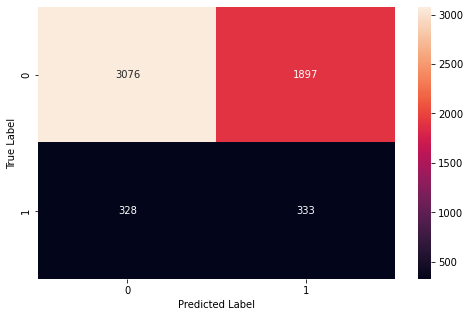

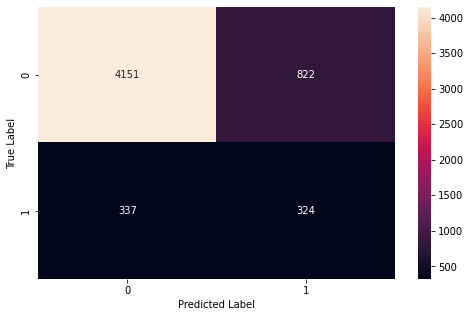

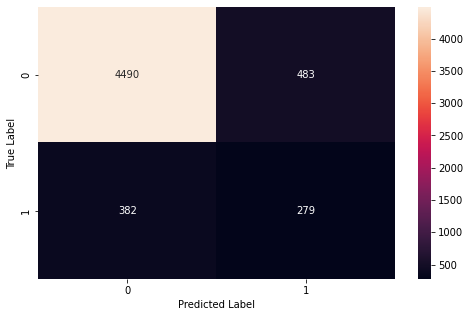

In [57]:
# Visualisasi hasil klasifikasi
for model in cm_list:
  f, ax = plt.subplots(figsize=(8,5))
  sns.heatmap(model, annot=True, fmt=".0f", ax=ax)
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.show()

In [58]:
# Evaluation Metrics
def classification_eval (aktual, prediksi, name):
    cm = confusion_matrix(aktual, prediksi)
    tp = cm[1][1]
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    
    accuracy = round((tp + tn) / (tp + tn + fp + fn) * 100, 2)
    precision = round((tp) / (tp + fp) * 100, 2)
    recall = round((tp) / (tp + fn) * 100, 2)
    f1_score = round((2 * (precision * recall) / (precision + recall)))
    
    print('Evaluation Model:', name)
    print(cm)
    print('Accuracy   :', accuracy, '%')
    print('Precision  :', precision, '%')
    print('Recall     :', recall, '%')
    print('F1_Score   :', f1_score, '%')

#### 2.4.6.1 KNN

In [59]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, Y_train)

KNeighborsClassifier(n_neighbors=7)

In [60]:
Y_train_pred = knn.predict(X_train_scaled)
Y_test_pred = knn.predict(X_test_scaled)

In [61]:
classification_eval(Y_train, Y_train_pred, 'KNN Training')

Evaluation Model: KNN Training
[[19564   293]
 [ 2012   665]]
Accuracy   : 89.77 %
Precision  : 69.42 %
Recall     : 24.84 %
F1_Score   : 37 %


In [62]:
classification_eval(Y_test, Y_test_pred, 'KNN Testing')

Evaluation Model: KNN Testing
[[4842  131]
 [ 570   91]]
Accuracy   : 87.56 %
Precision  : 40.99 %
Recall     : 13.77 %
F1_Score   : 21 %


#### 2.4.6.2 Decision Tree

In [63]:
dt = DecisionTreeClassifier(max_depth=7) # bisa cek pake gini atau pake entropy
dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=7)

In [64]:
Y_train_pred = dt.predict(X_train)
Y_test_pred = dt.predict(X_test)

In [65]:
classification_eval(Y_train, Y_train_pred, 'Decision Tree Training')

Evaluation Model: Decision Tree Training
[[19847    10]
 [ 2442   235]]
Accuracy   : 89.12 %
Precision  : 95.92 %
Recall     : 8.78 %
F1_Score   : 16 %


In [66]:
classification_eval(Y_test, Y_test_pred, 'Decision Tree Testing')

Evaluation Model: Decision Tree Testing
[[4966    7]
 [ 609   52]]
Accuracy   : 89.07 %
Precision  : 88.14 %
Recall     : 7.87 %
F1_Score   : 14 %


#### 2.4.6.3 Random Forest

In [67]:
rf = RandomForestClassifier(max_depth=7)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=7)

In [68]:
Y_train_pred = rf.predict(X_train)
Y_test_pred = rf.predict(X_test)

In [69]:
classification_eval(Y_train, Y_train_pred, 'Random Forest Training')

Evaluation Model: Random Forest Training
[[19857     0]
 [ 2566   111]]
Accuracy   : 88.61 %
Precision  : 100.0 %
Recall     : 4.15 %
F1_Score   : 8 %


In [70]:
classification_eval(Y_test, Y_test_pred, 'Random Forest testing')

Evaluation Model: Random Forest testing
[[4973    0]
 [ 637   24]]
Accuracy   : 88.69 %
Precision  : 100.0 %
Recall     : 3.63 %
F1_Score   : 7 %


#### 2.4.6.4 XGBoost

In [71]:
# Fit model no training data
model_xgb = XGBClassifier()

model_xgb.fit(X_train, Y_train)

# Make predictions for test data
y_pred = model_xgb.predict(X_test)
predictions = [round(value) for value in y_pred]

# Evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 89.01%


#### 2.4.6.5 CatBoost

In [72]:
model_cbc = CatBoostClassifier()
model_cbc.fit(X_train, Y_train)
print(model_cbc)

Learning rate set to 0.038958
0:	learn: 0.6640872	total: 54.7ms	remaining: 54.7s
1:	learn: 0.6373460	total: 65ms	remaining: 32.5s
2:	learn: 0.6130496	total: 73.9ms	remaining: 24.6s
3:	learn: 0.5900802	total: 82.8ms	remaining: 20.6s
4:	learn: 0.5700020	total: 92ms	remaining: 18.3s
5:	learn: 0.5514999	total: 101ms	remaining: 16.8s
6:	learn: 0.5346913	total: 110ms	remaining: 15.6s
7:	learn: 0.5188217	total: 117ms	remaining: 14.5s
8:	learn: 0.5051556	total: 123ms	remaining: 13.5s
9:	learn: 0.4918592	total: 132ms	remaining: 13s
10:	learn: 0.4803956	total: 144ms	remaining: 12.9s
11:	learn: 0.4693441	total: 160ms	remaining: 13.2s
12:	learn: 0.4597264	total: 168ms	remaining: 12.8s
13:	learn: 0.4511543	total: 176ms	remaining: 12.4s
14:	learn: 0.4431670	total: 190ms	remaining: 12.5s
15:	learn: 0.4357897	total: 199ms	remaining: 12.2s
16:	learn: 0.4288180	total: 208ms	remaining: 12s
17:	learn: 0.4223348	total: 215ms	remaining: 11.7s
18:	learn: 0.4164506	total: 224ms	remaining: 11.6s
19:	learn: 0.4

In [73]:
expected_y  = Y_test
predicted_y = model_cbc.predict(X_test)

In [74]:
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      4973
         1.0       0.75      0.11      0.19       661

    accuracy                           0.89      5634
   macro avg       0.82      0.55      0.57      5634
weighted avg       0.88      0.89      0.85      5634

[[4949   24]
 [ 588   73]]


# **PREDICT DATA & MODELLING - DATA TEST**

In [74]:
data_test = pd.read('/content/drive/MyDrive/KAMPUS MERDEKA /Celerates Acceleration Program /FINAL PROJECT/Dataset/data_test.csv')
data_test.head()

# **SUMMARY**

> Berdasarkan beberapa uji coba model di atas, maka dapat disimpulkan bahwa model `XGBoost` dan `CatBoost` yang paling tepat untuk diaplikasikan pada **Credit Risk Analysis** dataset

In [75]:
data_test['default'] = ranfor.predict(data_test[['student','employment','credit_card','balance','income','age','monthly tenure']])

data_test[['customer_id', 'default']].to_csv('submission_data.csv', index = False)
data_test[['customer_id', 'default']].head(10)

NameError: ignored